<a href="https://colab.research.google.com/github/Ananya9304/Titanic-Survival-Prediction/blob/main/Titanic_Survival_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

In [5]:
ts = pd.read_csv('/content/train.csv')

In [6]:
ts.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
ts.shape

(891, 12)

In [8]:
ts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
ts.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [10]:
ts = ts.drop(columns='Cabin',axis=1)

In [11]:
ts.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [12]:
ts['Age'].fillna(ts['Age'].mean(),inplace=True)

<ipython-input-12-0d9fe16f2513>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  ts['Age'].fillna(ts['Age'].mean(),inplace=True)


In [14]:
print(ts['Embarked'].mode())

0    S
Name: Embarked, dtype: object


In [15]:
print(ts['Embarked'].mode()[0])

S


In [16]:
ts['Embarked'].fillna(ts['Embarked'].mode()[0],inplace=True)

In [17]:
ts.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [18]:
X = ts.drop(columns='Survived',axis=1)
Y = ts['Survived']

In [29]:
categorical_cols = X.select_dtypes(include=['object']).columns

In [30]:
label_encoder = LabelEncoder()

In [31]:
for col in categorical_cols:
    X[col] = label_encoder.fit_transform(X[col])

In [32]:
print(X)

     PassengerId  Pclass  Name  Sex        Age  SibSp  Parch  Ticket     Fare  \
0              1       3   108    1  22.000000      1      0     523   7.2500   
1              2       1   190    0  38.000000      1      0     596  71.2833   
2              3       3   353    0  26.000000      0      0     669   7.9250   
3              4       1   272    0  35.000000      1      0      49  53.1000   
4              5       3    15    1  35.000000      0      0     472   8.0500   
..           ...     ...   ...  ...        ...    ...    ...     ...      ...   
886          887       2   548    1  27.000000      0      0     101  13.0000   
887          888       1   303    0  19.000000      0      0      14  30.0000   
888          889       3   413    0  29.699118      1      2     675  23.4500   
889          890       1    81    1  26.000000      0      0       8  30.0000   
890          891       3   220    1  32.000000      0      0     466   7.7500   

     Embarked  
0          

In [33]:
print(Y)

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


In [34]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.1,random_state=1)

In [35]:
model = LogisticRegression()

In [37]:
model.fit(X_train,Y_train)
print(model)


LogisticRegression()


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [38]:
X_train_prediction = model.predict(X_train)
training_data_score=accuracy_score(X_train_prediction,Y_train)

In [39]:
print('Accuracy score of training data is : ',training_data_score)

Accuracy score of training data is :  0.8027465667915106


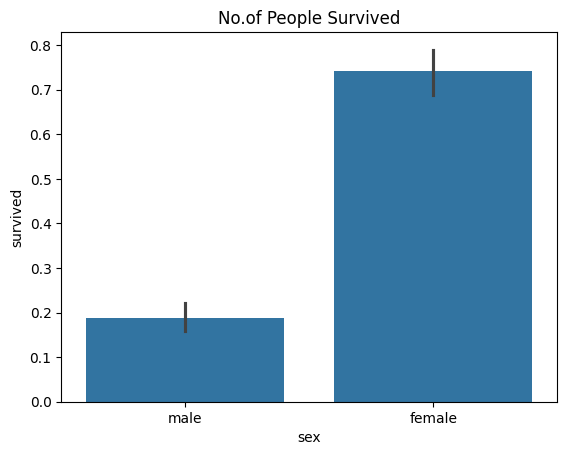

In [47]:

sns.barplot(x=ts['Sex'], y=ts['Survived'])
plt.title('No.of People Survived')
plt.xlabel('sex')
plt.ylabel('survived')
plt.show()